In [1]:
# Import Dependencies

import pandas as pd
import quandl
import matplotlib.pyplot as plt
import seaborn as sns

from config import api_key

%matplotlib inline

In [3]:
# retrieve gold price time series from Quandl API

# ***** remove API key hash tag below to run API call , used to prevent excessive calls *****

quandl.ApiConfig.api_key = #api_key  
raw_data = quandl.get('LBMA/GOLD', start_date='2010-01-01', end_date='2020-11-30', order='desc')
raw_data.head(10)

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2020-11-16,1892.60,1885.60,1436.67,1430.98,1598.11,1594.84
2020-11-13,1878.20,1890.90,1425.93,1437.08,1588.02,1600.27
2020-11-12,1868.00,1874.85,1415.57,1424.70,1581.08,1589.31
2020-11-11,1876.20,1860.95,1415.41,1408.37,1591.02,1583.48
2020-11-10,1874.90,1878.70,1416.49,1417.48,1589.54,1590.13
2020-11-09,1957.45,1867.30,1489.23,1417.47,1648.76,1573.95
2020-11-06,1947.95,1940.80,1483.17,1480.05,1642.71,1636.29
2020-11-05,1916.80,1938.45,1468.84,1480.78,1624.68,1638.38
2020-11-04,1888.55,1900.15,1455.69,1462.17,1616.41,1621.97


In [4]:
raw_data.tail(10)

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2010-01-15,1132.00,1128.00,695.332,692.875,786.652,784.969
2010-01-14,1137.50,1138.25,698.710,698.099,783.834,785.921
2010-01-13,1132.75,1127.25,697.377,693.266,780.615,776.343
2010-01-12,1152.75,1151.25,713.821,712.495,794.836,793.145
2010-01-11,1158.00,1153.00,716.318,714.817,797.740,794.351
2010-01-08,1121.75,1126.75,699.913,704.395,783.400,786.837
2010-01-07,1130.75,1130.25,709.468,710.090,787.650,789.060
2010-01-06,1125.00,1130.00,702.774,708.020,783.317,786.579
2010-01-05,1125.25,1123.25,701.702,700.324,779.529,779.385


In [5]:
# delete extra columns

clean_data = raw_data[['USD (AM)', 'USD (PM)']]
clean_data.head()

,USD (AM),USD (PM)
Date,,
2020-11-16,1892.6,1885.60
2020-11-13,1878.2,1890.90
2020-11-12,1868.0,1874.85
2020-11-11,1876.2,1860.95
2020-11-10,1874.9,1878.70


In [6]:
# rename columns

clean_data = clean_data.rename(columns={"USD (AM)":"open_price", "USD (PM)":"close_price"})
clean_data.head()

,open_price,close_price
Date,,
2020-11-16,1892.6,1885.60
2020-11-13,1878.2,1890.90
2020-11-12,1868.0,1874.85
2020-11-11,1876.2,1860.95
2020-11-10,1874.9,1878.70


In [7]:
# check for null values
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2749 entries, 2020-11-16 to 2010-01-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_price   2749 non-null   float64
 1   close_price  2729 non-null   float64
dtypes: float64(2)
memory usage: 64.4 KB


In [8]:
# drop the null rows and re-check for null values
clean_data = clean_data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2729 entries, 2020-11-16 to 2010-01-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_price   2729 non-null   float64
 1   close_price  2729 non-null   float64
dtypes: float64(2)
memory usage: 64.0 KB


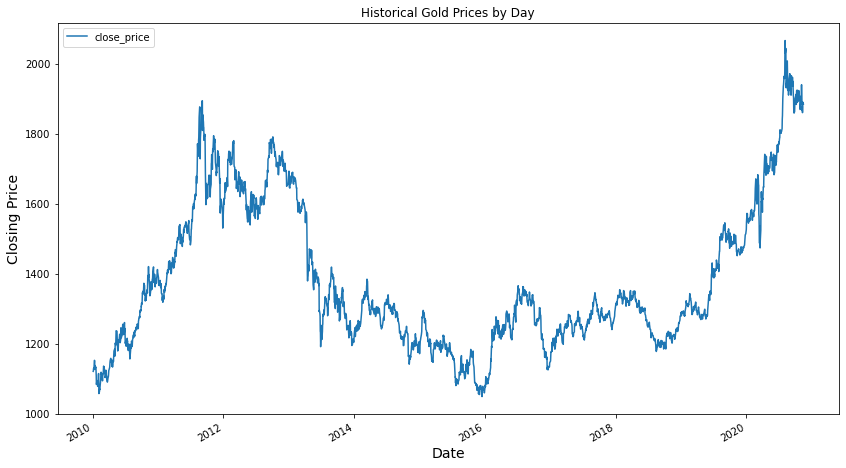

In [9]:
# plot close price vs. time to review completeness of data

clean_data.plot(y='close_price', figsize=(14,8))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('Historical Gold Prices by Day')
plt.show()

Skewness: %f 0.8935370049163678
Kurtosis: -0.100384


C:\Users\dave\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


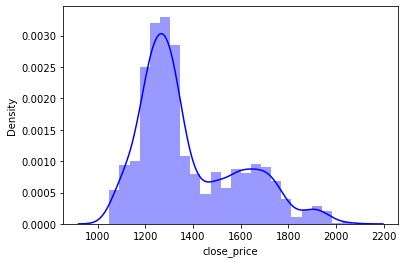

In [10]:
# check target variable

sns.distplot(clean_data['close_price'], color = 'blue')
print('Skewness: %f', clean_data['close_price'].skew())
print("Kurtosis: %f" % clean_data['close_price'].kurt())